In [4]:
from Assemblies.game import GameField
import numpy as np

from fractions import Fraction

%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation as animation

np.set_printoptions(precision=3)

In [2]:
def string_field(field):
    """Poor-man's viz of the game field."""
    s_rows = ["".join(str(row)[1:-1].split()) for row in field]
    return "\n".join(s_rows)

In [3]:
"""Candidate fractions (num & den <= 7)."""
all_fracs = set()
for den in range(1, 7+1):
    for num in range(1, 7+1):
        all_fracs.add(Fraction(num, den))
fracs = [f for f in all_fracs if 1 < f < 3]
fracs = sorted(list(fracs))
fracs

[Fraction(7, 6),
 Fraction(6, 5),
 Fraction(5, 4),
 Fraction(4, 3),
 Fraction(7, 5),
 Fraction(3, 2),
 Fraction(5, 3),
 Fraction(7, 4),
 Fraction(2, 1),
 Fraction(7, 3),
 Fraction(5, 2)]

In [4]:
"""Candidate fractions (num & den <= 9)."""
all_fracsQ = set()
for den in range(1, 9+1):
    for num in range(1, 9+1):
        all_fracsQ.add(Fraction(num, den))
fracsQ = [f for f in all_fracsQ if 1 < f < 3]
fracsQ = sorted(list(fracsQ))
fracsQ

[Fraction(9, 8),
 Fraction(8, 7),
 Fraction(7, 6),
 Fraction(6, 5),
 Fraction(5, 4),
 Fraction(9, 7),
 Fraction(4, 3),
 Fraction(7, 5),
 Fraction(3, 2),
 Fraction(8, 5),
 Fraction(5, 3),
 Fraction(7, 4),
 Fraction(9, 5),
 Fraction(2, 1),
 Fraction(9, 4),
 Fraction(7, 3),
 Fraction(5, 2),
 Fraction(8, 3)]

In [5]:
# init
L = 30
fraction_D = 0.1

In [6]:
def switch_time(b, game_type="T", num_steps=1000, num_therm=1000, seed=12388):

    rndm = np.random.RandomState(seed)

    # Init the field
    instance = (rndm.uniform(size=(L, L)) < fraction_D).astype(int)
    game = GameField(L, b)
    game.field = instance

    # burn-in
    evolve = {"T": game.evolveT,
              "Q": game.evolveQ}[game_type]
    evolve(num_therm)

    snapshots = np.zeros((L, L, num_steps), dtype=int)
    snapshots[:, :, 0] = game.field

    for step in range(num_steps):
        evolve(1)
        snapshots[:, :, step] = game.field

    # compute the switch times
    switches = np.zeros_like(snapshots[:, :, 0], dtype=int)

    for i in range(snapshots.shape[0]):
        for j in range(snapshots.shape[1]):
            s = snapshots[i, j, :]
            idx, = (s[1:] - s[:-1]).nonzero()
            switches[i, j] = idx.size + 1

    return np.mean(num_steps / switches), switches

In [7]:
def compute_times(fracs, game_type="T", num_steps=1000, num_therm=1000, seed=12388):
    mean_tau = dict()
    for frac in fracs:
        b = frac + 1e-3
        mean_tau[frac], _ = switch_time(b, game_type, num_steps, num_therm, seed)
        print(frac, mean_tau[frac])
    return mean_tau

In [146]:
mean_tau = compute_times(fracs, game_type="T")

7/6 820.18
6/5 914.53
5/4 897.88
4/3 986.68
7/5 830.174437781
3/2 928.96665336
5/3 936.771581065
7/4 636.143917198
2 961.162203898
7/3 1000.0
5/2 1000.0


In [134]:
compute_times(fracs, num_steps=10000)

7/6 8066.86
6/5 9388.95111067
5/4 9044.54
4/3 9466.72
7/5 8166.85555467
3/2 8800.12610997
5/3 9422.31554789
7/4 4386.34489095
2 9766.69638735
7/3 9533.47331734
5/2 10000.0


{Fraction(7, 6): 8066.8599999999997,
 Fraction(6, 5): 9388.9511106667542,
 Fraction(5, 4): 9044.5400000000009,
 Fraction(4, 3): 9466.7199999999993,
 Fraction(7, 5): 8166.855554666844,
 Fraction(3, 2): 8800.1261099724125,
 Fraction(5, 3): 9422.3155478909212,
 Fraction(7, 4): 4386.3448909524786,
 Fraction(2, 1): 9766.6963873474633,
 Fraction(7, 3): 9533.4733173377335,
 Fraction(5, 2): 10000.0}

In [143]:
compute_times(fracsQ, game_type="Q", num_steps=int(1e4))

9/8 8311.28
8/7 9266.74
7/6 9200.08
6/5 9911.12
5/4 9555.6
9/7 8455.71
4/3 8900.11666489
7/5 9377.86888456
3/2 7689.26885896
8/5 7844.70997627
5/3 8433.49777689
7/4 9644.49717852
9/5 4.10713088859
2 10000.0
9/4 10000.0
7/3 10000.0
5/2 10000.0
8/3 10000.0


{Fraction(9, 8): 8311.2800000000007,
 Fraction(8, 7): 9266.7399999999998,
 Fraction(7, 6): 9200.0799999999999,
 Fraction(6, 5): 9911.1200000000008,
 Fraction(5, 4): 9555.6000000000004,
 Fraction(9, 7): 8455.7099999999991,
 Fraction(4, 3): 8900.1166648892431,
 Fraction(7, 5): 9377.8688845557717,
 Fraction(3, 2): 7689.2688589556774,
 Fraction(8, 5): 7844.7099762747994,
 Fraction(5, 3): 8433.4977768890658,
 Fraction(7, 4): 9644.4971785176549,
 Fraction(9, 5): 4.1071308885921978,
 Fraction(2, 1): 10000.0,
 Fraction(9, 4): 10000.0,
 Fraction(7, 3): 10000.0,
 Fraction(5, 2): 10000.0,
 Fraction(8, 3): 10000.0}

In [8]:
def compute_times_and_volumes(fracs, game_type="T", num_steps=1000, num_therm=1000, seed=12388):
    mean_tau, num_swingers, tau_swingers = dict(), dict(), dict()
    for frac in fracs:
        b = frac + 1e-3
        mean_tau[frac], switches = switch_time(b, game_type, num_steps, num_therm, seed)
        
        swingers = switches > 1
        num_swingers[frac] = np.count_nonzero(swingers)
        tau_swingers[frac] = np.mean(num_steps / switches[swingers])
        print(frac, mean_tau[frac], ' - ', num_swingers[frac], ' - ', tau_swingers[frac])
    return mean_tau, num_swingers, tau_swingers

#print("============ T: ")
#tauT, num_swingersT, tau_swingersT = compute_times_and_volumes(fracs, num_steps=int(2e4))
#print("============ Q: ")
#tauQ, num_swingersQ, tau_swingersQ = compute_times_and_volumes(fracsQ, game_type="Q", num_steps=int(2e4))

In [36]:
num_seeds = 3

tauT_all, num_swT_all, tau_swT_all = [], [], []
tauQ_all, num_swQ_all, tau_swQ_all = [], [], []

for seed in [11]: #, 12388, 123]:
    print("========== seed = ", seed)
    print("=== T: ")
    tauT, num_swingersT, tau_swingersT = compute_times_and_volumes(fracs, num_steps=int(10000))
    tauT_all.append(tauT)
    num_swT_all.append(num_swingersT)
    tau_swT_all.append(tau_swingersT)
    print("=== Q: ")
    tauQ, num_swingersQ, tau_swingersQ = compute_times_and_volumes(fracsQ, game_type="Q", num_steps=int(10000))
    tauQ_all.append(tauQ)
    num_swQ_all.append(num_swingersQ)
    tau_swQ_all.append(tau_swingersQ)

========== seed =  11
=== T: 
7/6 8200.18  -  162  -  1.0
6/5 9144.53  -  77  -  1.0
5/4 8977.88  -  92  -  1.0
4/3 9866.68  -  12  -  1.0
7/5 8300.17444378  -  153  -  1.02613986948
3/2 9288.96666533  -  64  -  1.09373125375
5/3 9366.77165809  -  57  -  1.65775924729
7/4 6361.30220797  -  348  -  589.574675785
2 9611.16222039  -  35  -  1.31423857379


/home/br/virtualenvs/py35/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/br/virtualenvs/py35/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


7/3 10000.0  -  0  -  nan
5/2 10000.0  -  0  -  nan
=== Q: 
9/8 8589.03  -  127  -  1.0
8/7 9555.6  -  40  -  1.0
7/6 9555.6  -  40  -  1.0
6/5 9644.48  -  32  -  1.0
5/4 9822.24  -  16  -  1.0
9/7 7889.1  -  190  -  1.0
4/3 8900.11666567  -  99  -  1.06059697015
7/5 9922.23388831  -  7  -  1.49992500375
3/2 7411.5188615  -  233  -  1.57500149612
8/5 8355.74055225  -  148  -  1.1249799035
5/3 8833.46147733  -  105  -  1.09837715267
7/4 9855.57  -  13  -  1.0
9/5 4.10111122811  -  900  -  4.10111122811
2 10000.0  -  0  -  nan
9/4 10000.0  -  0  -  nan
7/3 10000.0  -  0  -  nan
5/2 10000.0  -  0  -  nan
8/3 10000.0  -  0  -  nan


In [25]:
def merge_dicts(keys, *dicts):
    dct = {}
    for key in keys:
        dct[key] = [d[key] for d in dicts]
    return dct

def average_dicts(keys, *dicts):
    dct = merge_dicts(keys, *dicts)
    av = dict()
    for key in dct.keys():
        av[key] = np.mean(dct[key])
    return av

In [26]:
average_dicts(tauT_all[0].keys(), *tauT_all)

{Fraction(7, 6): 820.17999999999995,
 Fraction(6, 5): 914.53000000000009,
 Fraction(5, 4): 897.88,
 Fraction(4, 3): 986.67999999999995,
 Fraction(7, 5): 830.17443778110953,
 Fraction(3, 2): 928.96665335994692,
 Fraction(5, 3): 936.77158106533773,
 Fraction(7, 4): 636.14391719774869,
 Fraction(2, 1): 961.16220389805096,
 Fraction(7, 3): 1000.0,
 Fraction(5, 2): 1000.0}

In [29]:
average_dicts(tauT_all[0].keys(), *num_swT_all)

{Fraction(7, 6): 162.0,
 Fraction(6, 5): 77.0,
 Fraction(5, 4): 92.0,
 Fraction(4, 3): 12.0,
 Fraction(7, 5): 153.0,
 Fraction(3, 2): 64.0,
 Fraction(5, 3): 57.0,
 Fraction(7, 4): 348.0,
 Fraction(2, 1): 35.0,
 Fraction(7, 3): 0.0,
 Fraction(5, 2): 0.0}

In [30]:
average_dicts(tauT_all[0].keys(), *tau_swT_all)

{Fraction(7, 6): 1.0,
 Fraction(6, 5): 1.0,
 Fraction(5, 4): 1.0,
 Fraction(4, 3): 1.0,
 Fraction(7, 5): 1.0261045947614429,
 Fraction(3, 2): 1.0935628742514969,
 Fraction(5, 3): 1.6565431369135606,
 Fraction(7, 4): 58.992889304522606,
 Fraction(2, 1): 1.3138145213107735,
 Fraction(7, 3): nan,
 Fraction(5, 2): nan}

In [33]:
average_dicts(tauT_all[0].keys(), *tauQ_all)

{Fraction(7, 6): 955.60000000000002,
 Fraction(6, 5): 964.48000000000002,
 Fraction(5, 4): 982.24000000000012,
 Fraction(4, 3): 890.11665667166415,
 Fraction(7, 5): 992.23388305847084,
 Fraction(3, 2): 741.51861546767248,
 Fraction(5, 3): 883.46144011420301,
 Fraction(7, 4): 985.57000000000005,
 Fraction(2, 1): 1000.0,
 Fraction(7, 3): 1000.0,
 Fraction(5, 2): 1000.0}

In [34]:
average_dicts(tauT_all[0].keys(), *num_swQ_all)

{Fraction(7, 6): 40.0,
 Fraction(6, 5): 32.0,
 Fraction(5, 4): 16.0,
 Fraction(4, 3): 99.0,
 Fraction(7, 5): 7.0,
 Fraction(3, 2): 233.0,
 Fraction(5, 3): 105.0,
 Fraction(7, 4): 13.0,
 Fraction(2, 1): 0.0,
 Fraction(7, 3): 0.0,
 Fraction(5, 2): 0.0}

In [35]:
average_dicts(tauT_all[0].keys(), *tau_swQ_all)

{Fraction(7, 6): 1.0,
 Fraction(6, 5): 1.0,
 Fraction(5, 4): 1.0,
 Fraction(4, 3): 1.060515196946981,
 Fraction(7, 5): 1.4992503748125936,
 Fraction(3, 2): 1.5740511626829938,
 Fraction(5, 3): 1.0980581217408563,
 Fraction(7, 4): 1.0,
 Fraction(2, 1): nan,
 Fraction(7, 3): nan,
 Fraction(5, 2): nan}

# Tries and attempts

In [117]:
# init
L = 30
fraction_D = 0.1
b = 1.78

rndm = np.random.RandomState(12345)

instance = (rndm.uniform(size=(L, L)) < fraction_D).astype(int)
game = GameField(L, b)
game.field = instance

In [118]:
num_steps = 500

snapshots = np.zeros((L, L, num_steps), dtype=int)
snapshots[:, :, 0] = game.field

for step in range(num_steps):
    game.evolveQ(1)
    snapshots[:, :, step] = game.field

In [96]:
print(string_field(snapshots[..., -1]))

1111100111
1111101111
1111101111
1111111111
1111111111
1111111111
1111111111
1111111111
1111111111
1111100111


In [19]:
snapshots[..., 0].shape

(10, 10)

In [32]:
snapshots[1, 8, :]

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [36]:
mask = snapshots[1, 8, 1:] != snapshots[1, 8, :-1]
mask

array([ True, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False, False], dtype=bool)

In [34]:
mask.sum() / mask.shape[0]

0.89473684210526316

In [37]:
mask.nonzero()

(array([0, 7]),)

In [45]:
nnz = (snapshots[..., 1:] != snapshots[..., :-1]).nonzero()

In [64]:
s00 = snapshots[0, 0, :]
s00

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0])

In [66]:
(s00[1:] != s00[:-1]).nonzero()

(array([1, 7]),)

# Average switch times

Switches at indices $n_1, n_2$. Pad with $0$ and $N$ (=.size-1) : have $0, n_1, n_2, N$.

(Here, $n_1 = 1$, $n_2 = 7$, $N=10$)

Times between switches:

$$
n_1 - 0 + 1  = 2\\
n_2 - n_1 = 6 \\
N - n_2  = 10 - 7 = 3\\
$$

Mean time is then,

$$
\langle \tau \rangle = \dfrac{(n_1 + 1) + (n_2 - n_1) + (N - n_2)}{k+1} = \dfrac{N+1}{k+1} = \frac{\text{num time steps}}{\text{len(nonzero) + 1}}
$$

In [119]:
switches = np.zeros_like(snapshots[:, :, 0], dtype=int)

for i in range(snapshots.shape[0]):
    for j in range(snapshots.shape[1]):
        s = snapshots[i, j, :]
        idx, = (s[1:] - s[:-1]).nonzero()
        switches[i, j] = idx.size + 1

In [120]:
switches

array([[  2,   2,   2,   2,   2,   3,   2,   2,   2,   4,   4,   2,   2,
          6,   2,   1,   1,   1,   1,   1,   1,   1,   8,   8,   4,   6,
          1,   1,   2,   2],
       [  2,   2,   2,   2,   2,   3,   2,   4,   2,   3,   3,   2,   2,
          2,   2,   1,   1,   1,   1,   1,   1,   1,   2,   6,   3,   7,
          1,   1,   1,   2],
       [  2,   2,   2,   2,   2,   3,   2,   4,   4,   2,   2,   3,   2,
          2,   2,   1,   1,   1,   1,   1,   1,   1,   2,   5,   2,   6,
          1,   1,   1,   2],
       [  3,   2,   2,   2,   3,   3,   3,   4,   2,   2,   4,   6,   6,
          6,   6,   6,   1,   1,   1,   1,   1,   1,   1,   4,   5,   8,
          3,   1,   1,   3],
       [  2,   2,   2,   4,   8,   9,   8,   8,   4,   4,   2,   4,   4,
          3,   5,   3,   1,   1,   1,   1,   1,   1,   1,   2,   3,   1,
        495,   2,   1,   4],
       [  1,   1,   1,   5,   1,   1,   7,   5,   4,  10,   4,   7,   3,
          5,   6,   6,   2,   2,   1,   1,   1,   1,

In [121]:
np.mean(num_steps / switches)

260.19213816550382

# Amimations

<IPython.core.display.Javascript object>


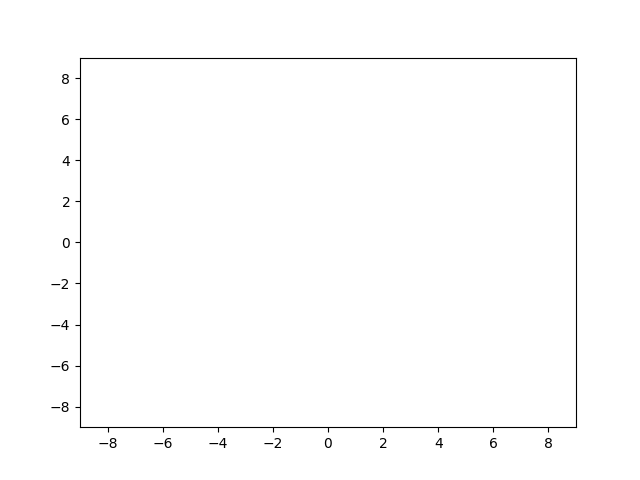

In [5]:
fig2 = plt.figure()

x = np.arange(-9, 10)
y = np.arange(-9, 10).reshape(-1, 1)
base = np.hypot(x, y)
ims = []
for add in np.arange(15):
    ims.append((plt.pcolor(x, y, base + add, norm=plt.Normalize(0, 30)),))

im_ani = animation.ArtistAnimation(fig2, ims, interval=50, repeat_delay=3000,
                                   blit=True)
# To save this second animation with some metadata, use the following command:
# im_ani.save('im.mp4', metadata={'artist':'Guido'})

plt.show()